# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.001
0.0
0.0
-0.001
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.002
-0.002
-0.002
0.0
0.0
0.0
0.0
0.001
-0.001
-0.001
0.0
-0.001
0.0
-0.003
-0.003
1.002
1.002
0.998
1.0
1.994
1.996
1.998
1.997
1.996
2.967
2.969
2.972
2.972
2.97
3.944
3.943
3.943
3.943
3.943
4.932
4.932
4.932
5.904
5.906
5.907
5.906
5.908
6.714
6.715
6.717
6.717
6.717
7.528
7.53
7.53
7.53
7.53
8.515
8.518
8.519
8.518
8.518
9.504
9.506
9.508
9.508
9.508
10.487
10.49
10.489
10.489
10.49
11.474
11.476
11.479
11.478
11.477
11.477
12.468
12.467
12.467
13.449
13.452
13.454
13.453
13.453
14.105
14.107
14.109
14.108
14.108
14.735
14.741
14.741
14.74
14.74
15.725
15.731
15.731
15.729
15.729
16.72
16.72
16.72
16.719
17.703
17.706
17.706
17.706
17.706
18.696
18.696
18.694
18.694
19.685
19.684
19.683
19.68
20.654
20.656
20.659
20.659
21.209
21.208
21.208
21.751
21.75
21.749
21.749
22.731
22.73
22.73
22.73
23.734
23.734
23.732
23.732
24.737
24.736
24.734
24.7

56.261
56.261
56.261
56.26
56.26
56.26
56.26
56.26
56.26
56.26
56.26
56.26
56.26
56.26
56.26
56.26
56.257
56.256
56.256
56.257
56.257
56.307
56.335
56.364
56.392
56.418
56.417
56.417
56.416
56.416
56.416
56.416
56.416
56.416
56.416
56.415
56.415
56.427
56.427
56.426
56.426
56.426
56.427
56.427
56.426
56.426
56.426
56.426
56.426
56.425
56.425
56.425
56.425
56.425
56.425
56.425
56.425
56.425
56.424
56.424
56.423
56.423
56.422
56.422
56.422
56.422
56.422
56.422
56.422
56.422
56.422
56.422
56.422
56.42
56.419
56.419
56.419
56.42
56.446
56.526
56.553
56.581
56.607
56.607
56.607
56.607
56.621
56.622
56.622
56.622
56.621
56.621
56.621
56.623
56.622
56.621
56.602
56.631
56.631
56.631
56.629
56.629
56.629
56.629
56.63
56.626
56.629
56.63
56.63
56.63
56.629
56.628
56.628
56.628
56.628
56.628
56.628
56.628
56.628
56.628
56.628
56.627
56.627
56.627
56.627
56.627
56.627
56.626
56.626
56.625
56.649
56.676
56.702
56.728
56.728
56.729
56.728
56.727
56.728
56.728
56.726
56.726
56.739
56.739
56.738
56.7

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,-0.001
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1453,2906,59.009
1454,2908,59.009
1455,2910,59.009
1456,2912,59.006


<IPython.core.display.Javascript object>


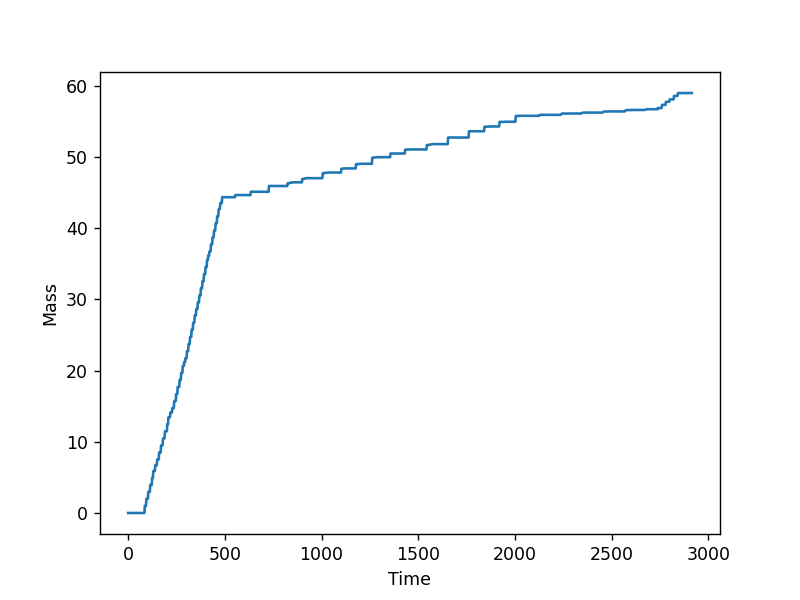

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_280323_S235-240.csv')